## Parallel coordinates plots

These plots essentially allow you to visualize a high dimensional scatterplot in 2-D by laying out the axis and then for each sample connecting its values with a line. Samples with similar line shapes are similar in some sense.

In [1]:
import pandas as pd
import os, sys, glob, inspect
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from importlib import reload

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import epri_mc_lib


In [2]:
# Otherwise jupyter ignores changes to the module
reload(epri_mc_lib)

<module 'epri_mc_lib' from '/home/nick/Bureau/Programming/S2DS/Oct20_EPRI/Task1/NB/epri_mc_lib.py'>

In [3]:
merged_tube = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/TUBE_merge_1.csv'),
                  index_col=0)
merged_pipe = pipe = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/PIPE_merge_1.csv'),
                  index_col=0)

# Since highly correlated only use one absorption measurement
merged_tube = merged_tube.drop(columns=epri_mc_lib.drop_list_absorption_500_200)
merged_pipe = merged_pipe.drop(columns=epri_mc_lib.drop_list_absorption_100)


In [4]:
measures_list = ["TEP_mean_uV_C","backscatter_avg","Absorption_avg_50","A","B","p","median_CF","median_perm","median_MBN"]
errors_list = ["TEP_error_uV_C","backscatter_std","Absorption_std_50","A std","B std","p std"]

data_tube = merged_tube[measures_list]
merged_tube_errors = merged_tube[errors_list]

# there is no error value for these measures
for col in "cf_std","mbn_std","perm_std":
    merged_tube_errors[col] = 0
    merged_tube[col] = 0

merged_tube_lower_bounds,merged_tube_upper_bounds = epri_mc_lib.calc_error_bounds(merged_tube, measures_list, errors_list + ["cf_std","mbn_std","perm_std"])

/home/nick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [6]:

scaled_tube, scaler = epri_mc_lib.scale_min_max(data_tube)
scaled_tube['condition'] = scaled_tube.index
# Ignoring the error bounds for now
#scaled_tube_min_boundary = transform_df(scaler, data_tube_min_boundary)
#scaled_tube_max_boundary = transform_df(scaler, data_tube_max_boundary)
#scaled_tube_min_boundary['condition'] = scaled_tube.index
#scaled_tube_max_boundary['condition'] = scaled_tube.index


In [7]:
scaled_tube

,TEP_mean_uV_C,backscatter_avg,Absorption_avg_50,A,B,p,median_CF,median_perm,median_MBN,condition
T_B1,0.988176,0.246988,0.135434,2.125604e-08,0.175882,0.058020,0.108867,0.503892,0.264006,T_B1
T_B2,0.975563,0.638554,0.635434,7.342995e-01,0.773565,0.242321,0.111207,0.474876,0.505756,T_B2
T_B3,0.981352,0.000000,0.096154,1.449276e-08,0.135861,0.054608,0.103818,0.502477,0.422870,T_B3
T_B4,0.000000,0.072289,0.470949,3.661835e-01,0.352291,0.331058,0.949754,0.000000,0.306216,T_B4
T_B5,0.985918,0.289157,0.085106,0.000000e+00,0.183781,0.146758,0.189901,0.453645,0.363776,T_B5
T_B6,0.124090,0.084337,0.159574,4.603866e-07,0.000000,0.023891,0.988670,0.016277,0.000000,T_B6
T_B7,0.958410,1.000000,0.398936,4.106281e-08,1.000000,1.000000,0.000000,1.000000,0.470453,T_B7
T_B8,0.675966,0.813253,0.000000,1.943479e-06,0.226962,0.153584,0.340394,0.352442,0.112817,T_B8
T_AR,0.987760,0.271084,0.132570,2.222223e-08,0.163244,0.003413,0.142241,0.409766,0.449731,T_AR
T_N,0.018823,0.716867,0.898118,6.956504e-02,0.494471,0.293515,0.945320,0.007077,0.445894,T_N


Text(0.5, 1.0, 'Tubes')

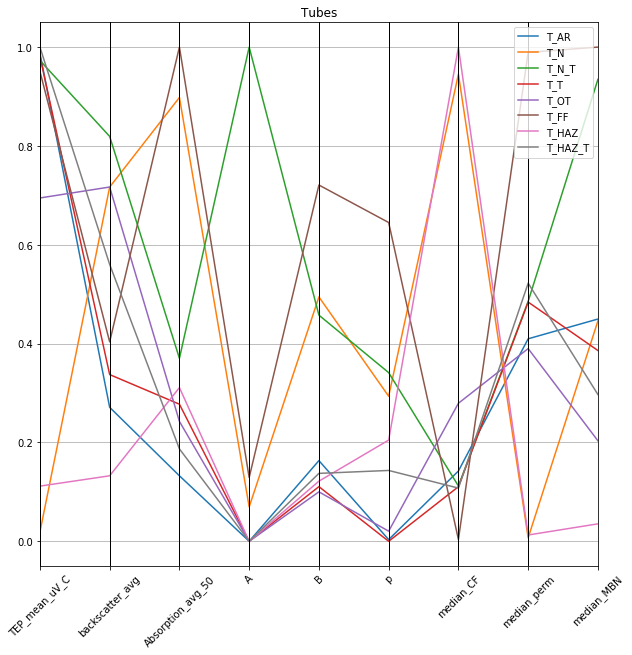

In [8]:
plt.figure(figsize=(10,10))
parallel_coordinates(scaled_tube.iloc[8:16,],class_column="condition",color=matplotlib.colors.TABLEAU_COLORS)
# Plots the error bars but the figure becomes too noisy
#parallel_coordinates(scaled_tube_max_boundary.iloc[8:16,],class_column="condition", alpha=.2,color=matplotlib.colors.TABLEAU_COLORS)
#parallel_coordinates(scaled_tube_min_boundary.iloc[8:16,],class_column="condition", alpha=.2,color=matplotlib.colors.TABLEAU_COLORS)
plt.xticks(rotation=45)
plt.title("Tubes (Known)")


Text(0.5, 1.0, 'Tubes')

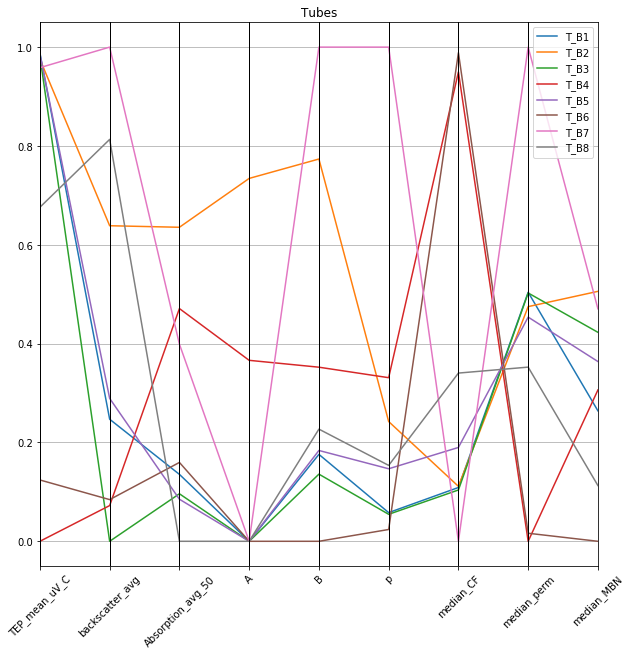

In [9]:

plt.figure(figsize=(10,10))
parallel_coordinates(scaled_tube.iloc[:8,],class_column="condition",color=matplotlib.colors.TABLEAU_COLORS)
plt.xticks(rotation=45)
plt.title("Tubes (Unknown)")
